<class 'pandas.core.frame.DataFrame'>
Int64Index: 84865 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

C:\Users\dryey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dryey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


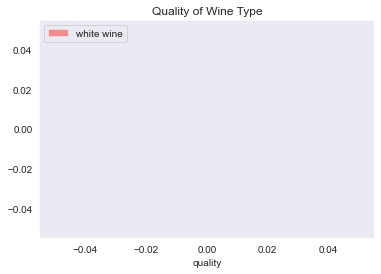

In [1]:
import pandas as pd
red_df=pd.read_csv('C:/Users/dryey/OneDrive/바탕 화면/source/My_Python/7장_data/winequality-red.csv',sep=';',header=0,engine='python')
white_df=pd.read_csv('C:/Users/dryey/OneDrive/바탕 화면/source/My_Python/7장_data/winequality-white.csv',sep=';',header=0,engine='python')
red_df.to_csv('C:/Users/dryey/OneDrive/바탕 화면/source/My_Python/7장_data/winequality-red2.csv',index=False)
white_df.to_csv('C:/Users/dryey/OneDrive/바탕 화면/source/My_Python/7장_data/winequality-white2.csv',index=False)

red_df.head()

red_df.insert(0,column='type',value='red')
red_df.head()
red_df.shape
white_df.head()
white_df.insert(0,column='type',value='white')
white_df.head()

white_df.shape
wine=pd.concat([red_df,white_df])
wine.shape

wine.to_csv('C:/Users/dryey/OneDrive/바탕 화면/source/My_Python/7장_data/winequality-red.csv',index=False)

print(wine.info())

wine.columns=wine.columns.str.replace(' ','_')
wine.head()
wine.describe()
sorted(wine.quality.unique())
wine.quality.value_counts()

wine.groupby('type')['quality'].describe()
wine.groupby('type')['quality'].mean()
wine.groupby('type')['quality'].std()
wine.groupby('type')['quality'].agg(['mean','std'])

from scipy import stats
from statsmodels.formula.api import ols,glm

red_wine_quality=wine.loc[wine['type']=='red','quality']
white_wine_quality=wine.loc[wine['type']=='white','quality']
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)
Rformula='quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'
regression_result=ols(Rformula,data=wine).fit()
regression_result.summary()


sample1=wine[wine.columns.difference(['quality','type'])]
sample1=sample1[0:5][:]
sample1_predict=regression_result.predict(sample1)
sample1_predict

wine[0:5]['quality']

data={"fixed_acidity":[8.5,8.1],"volatile_acidity":[0.8,0.5],"citric_acid":[0.3,0.4],"residual_sugar":[6.1,5.8],"chlorides":[
  0.055,0.04],"free_sulfur_dioxide":[30.0,31.0],"total_sulfur_dioxide":[98.0,99],"density":[0.996,0.91],"pH":[3.25,3.01],"sulphates":[0.4,0.35],"alcohol":[9.0,0.88]}

sample2=pd.DataFrame(data,columns=sample1.columns)
sample2
sample2_predict=regression_result.predict(sample2)
sample2_predict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color="red",label='white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()
